In [3]:
import torch
import torch.nn as nn  
import torch.optim as optim
import torch.nn.functional as F 
import numpy as np 
import matplotlib.pyplot as plt
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
torch.set_warn_always(False)

In [4]:
print(dir(torchvision.datasets))

['CIFAR10', 'CIFAR100', 'CLEVRClassification', 'CREStereo', 'Caltech101', 'Caltech256', 'CarlaStereo', 'CelebA', 'Cityscapes', 'CocoCaptions', 'CocoDetection', 'Country211', 'DTD', 'DatasetFolder', 'EMNIST', 'ETH3DStereo', 'EuroSAT', 'FER2013', 'FGVCAircraft', 'FakeData', 'FallingThingsStereo', 'FashionMNIST', 'Flickr30k', 'Flickr8k', 'Flowers102', 'FlyingChairs', 'FlyingThings3D', 'Food101', 'GTSRB', 'HD1K', 'HMDB51', 'INaturalist', 'ImageFolder', 'ImageNet', 'Imagenette', 'InStereo2k', 'KMNIST', 'Kinetics', 'Kitti', 'Kitti2012Stereo', 'Kitti2015Stereo', 'KittiFlow', 'LFWPairs', 'LFWPeople', 'LSUN', 'LSUNClass', 'MNIST', 'Middlebury2014Stereo', 'MovingMNIST', 'Omniglot', 'OxfordIIITPet', 'PCAM', 'PhotoTour', 'Places365', 'QMNIST', 'RenderedSST2', 'SBDataset', 'SBU', 'SEMEION', 'STL10', 'SUN397', 'SVHN', 'SceneFlowStereo', 'Sintel', 'SintelStereo', 'StanfordCars', 'UCF101', 'USPS', 'VOCDetection', 'VOCSegmentation', 'VisionDataset', 'WIDERFace', '__all__', '__builtins__', '__cached__',

In [5]:
transform = transforms.Compose([
    transforms.ToTensor(), # dataset is in np.array so we have to convert it into tensor 
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # Normalize((mean), (var))
])

trainset = torchvision.datasets.CIFAR10(
    root="./data", train = True, download=True, transform=transform
)
testset = torchvision.datasets.CIFAR10(
    root="./data", train = False, download=True, transform=transform
)

100%|██████████| 170498071/170498071 [11:20<00:00, 250710.29it/s]


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [6]:
print(trainset.classes)
print(testset.data.shape) # 32 x 32 x 3

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(10000, 32, 32, 3)


In [7]:
trainloader = DataLoader(trainset, batch_size = 4, shuffle = True)
testloader = DataLoader(testset, batch_size = 4, shuffle = False)

In [8]:
classes = (
    'plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 
    'horse', 'ship', 'truck'
)

In [9]:
X_train = iter(trainloader)

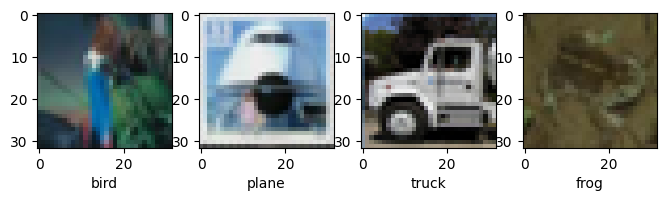

In [12]:
imgs, labels = next(X_train)

fig, ax = plt.subplots(1, 4, figsize = (8, 10))
i = 0
for img, label in zip(imgs, labels) : 
    img = img/2 + 0.5 
    npimg = img.numpy()
    ax[i].imshow(np.transpose(npimg, (1, 2, 0)))
    ax[i].set_xlabel(classes[label])
    i += 1 

In [24]:
class Net(nn.Module) : 
    def __init__(self) : 
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3,6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120) #120 neuros 
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x) : 
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x 

In [27]:
model = Net()
Loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001, momentum=0.9)

In [31]:
for epoch in range(2) : 
    running_loss = 0.0 
    running_acc = 0.0

    for i, data in enumerate(trainloader, 0) : 
        inputs, labels = data 
        optimizer.zero_grad()  
        outputs = model(inputs)
        loss = Loss(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        class_correct = torch.argmax(outputs, axis = 1) == torch.as_tensor(labels)
        running_acc += torch.count_nonzero(class_correct)/4 
        if i % 2000 == 1990 : 
            print('[%d, %5d] loss : %.3f Accuracy : %.3f' % (epoch + 1, i+1, running_loss/2000, running_acc/2000))
            running_loss = 0.0 
            running_acc = 0.0

[1,  1991] loss : 1.228 Accuracy : 0.553
[1,  3991] loss : 1.209 Accuracy : 0.572
[1,  5991] loss : 1.188 Accuracy : 0.578
[1,  7991] loss : 1.179 Accuracy : 0.582
[1,  9991] loss : 1.172 Accuracy : 0.580
[1, 11991] loss : 1.185 Accuracy : 0.589
[2,  1991] loss : 1.085 Accuracy : 0.613
[2,  3991] loss : 1.092 Accuracy : 0.611
[2,  5991] loss : 1.083 Accuracy : 0.615
[2,  7991] loss : 1.098 Accuracy : 0.613
[2,  9991] loss : 1.080 Accuracy : 0.617
[2, 11991] loss : 1.084 Accuracy : 0.616


In [34]:
model.eval()

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [35]:
test_acc = 0.0 
total_sample = 0 
for i, data in enumerate(testloader, 0) : 
    inputs, labels = data 
    outputs = model(inputs)

    class_correct = torch.argmax(outputs, axis=1) == torch.as_tensor(labels)

    total_sample =+ labels.shape[0]
    test_acc += torch.count_nonzero(class_correct)

print(test_acc/total_sample)

tensor(1522.2500)
